<a href="https://colab.research.google.com/github/RagaaM/Machine-learning/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
url = 'https://raw.githubusercontent.com/RagaaM/Machine-learning/main/log2.csv'
dataset = pd.read_csv(url)

# creating a dict file 
Action = {'drop':0, 'allow': 1,'deny':2, 'reset-both':3}

dataset.Action = [Action[item] for item in dataset.Action]
#print(dataset)

In [23]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
target = dataset.Action
dataset.columns = dataset.columns.str.replace(' ', '')

feature_columns = ['SourcePort', 'DestinationPort', 'NATSourcePort', 'NATDestinationPort', 'Bytes', 'BytesSent', 'BytesReceived', 'Packets', 'ElapsedTime(sec)', 'pkts_sent', 'pkts_received']
features = dataset[feature_columns]

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.25,random_state=100)

In [25]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
#Fitting the training data to the network
classifier.fit(X_train, y_train)
#Predicting y for X_test
y_pred = classifier.predict(X_test)

In [26]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[3215,    0,    0,    0],
       [  63, 8879,  451,    0],
       [ 128,    4, 3635,    0],
       [   0,    2,    6,    0]])

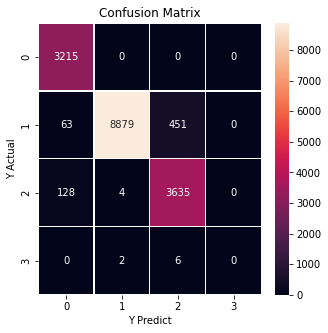

In [27]:
#Seaborn comments: 
#annotbool or rectangular dataset, optional : if True, write the data value in each cell.
#fmtstr, optional: String formatting code to use when adding annotations.
#axmatplotlib Axes, optional: Axes in which to draw the plot, otherwise use the currently-active Axes.
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.2,fmt=".0f",ax=ax)

plt.title("Confusion Matrix")
plt.xlabel("Y Predict")
plt.ylabel("Y Actual")
plt.show()

In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3215
           1       1.00      0.95      0.97      9393
           2       0.89      0.96      0.93      3767
           3       0.00      0.00      0.00         8

    accuracy                           0.96     16383
   macro avg       0.71      0.73      0.72     16383
weighted avg       0.96      0.96      0.96     16383



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
